# Lezione 3 - Altri elementi base, I costrutti/cicli principali

In questa lezione vedremo velocemente i tipi di oggetti base del linguaggio Python che ci mancano: **float**, per i calcoli in virgola mobile, **complex** per i numeri complessi e **bool** per i booleani. Accenneremo anche a **byte** e **bytearrays**, che per certi versi assimigliano alle stringhe.  
Parlare dei numeri a virgola mobile ci permetterà di accennare alle librerie, in particolare la **libreria math** per i calcoli matematici e la **libreria time** che contiene strumenti utili per tempi/date.  
Parlare dei numeri booleani ci permetterà di introdurre le relazioni logiche (AND, OR, NOT) ed i risultati di operazioni di confronto (maggiore, minore, uguale...), strumenti utilizzati per i cicli **if...elif...else**.  
Parleremo infine dei **cicli While** e dei **cicli For** con una variabile contatore intera (nel caso specifico dell'oggetto **range**).

## Altri elementi utili su print() ed input()

### Diversi modi di formattare le stringhe
Abbiamo visto che con **print()** si possono stampare a schermo **stringhe** o oggetti che implementano il metodo magico **__str__()**. Abbiamo parlato di formattazione del testo ed abbiamo visto due modi per stampare a schermo messaggi ben formattati:
- Concatenando stringhe con `+`, eventualmente convertendo a stringa i valori numerici (o altri oggetti) con `str()`
- Usando l'operatore di formattazione `%` con i relativi modificatori  

Questi due metodi sono molto efficienti al punto di vista computazionale, ma hanno delle limitazioni:
- La concatenazione non è molto leggibile e poco compatta dal punto di vista del coding style
- L'operatore di formattazione ha dei limiti su ciò che può visualizzare (ad esempio l'espressione binaria) e NON permette di decidere l'ordine con cui visualizzare i dati senza cambiare anche l'ordine delle variabili nella tuple

In [8]:
stringa1 = "Questo oggetto: "
numero = 5
numero2 = 76
stringa2 = " È un numero intero!"

# primo modo: concatenare le stringhe
print(stringa1 + str(numero) + stringa2)
# secondo modo: operatore %
print("%s%d%s" % (stringa1, numero, stringa2))

# se voglio stampare un messaggio utilizzando una variabile più volte
print(stringa1 + str(numero) + stringa2 + " - " + stringa1 + str(numero2) + stringa2)
print("%s%d%s - %s%d%s" % (stringa1, numero, stringa2, stringa1, numero2, stringa2))

Questo oggetto: 5 È un numero intero!
Questo oggetto: 5 È un numero intero!
Questo oggetto: 5 È un numero intero! - Questo oggetto: 76 È un numero intero!
Questo oggetto: 5 È un numero intero! - Questo oggetto: 76 È un numero intero!


Per formattare una stringa con possibilità di riutilizzare variabili già passate come argomento, decidendone arbitrariamente la posizione viene spesso utilizzato il **metodo format()** delle stringhe. Sebbene meno efficiente, viene utilizzato perchè permette di scrivere codice più leggibile ed effettuare operazioni non consentite con gli altri metodi. Anche con questo sistema sono disponibili dei modificatori per esprimere i numeri in diversi formati.  
[Documentazione di *format()*](https://www.programiz.com/python-programming/methods/string/format)

<div style="text-align:center"><img width="500px" src="images/python-format-positional-argument.jpg"><img width="500px" src="images/python-format-keyword-argument.jpg"></div>


In [9]:
# Terzo metodo: Uso di Format
stringa_formattata = "{0}{1} (=0b{1:08b}){2} - {0}{3} (=0b{3:08b}){2}".format(stringa1, numero, stringa2, numero2)
print(stringa_formattata)

# Assegnando del nomi alle variabili
stringa_formattata = "{str1}{n1} (=0b{n1:08b}){str2} - {str1}{n2} (=0b{n2:08b}){str2}".format(str1=stringa1, str2=stringa2, n1=numero, n2=numero2)
print(stringa_formattata)

Questo oggetto: 5 (=0b00000101) È un numero intero! - Questo oggetto: 76 (=0b01001100) È un numero intero!
Questo oggetto: 5 (=0b00000101) È un numero intero! - Questo oggetto: 76 (=0b01001100) È un numero intero!


Noi stiamo imparando il **Python 3.5** perchè è quello al momento usato nei dispositivi embedded e sulla Raspberry (ultima versione disponibile nativamente su Raspbian). I metodi visti di formattazione delle stringhe sono compatibili con qualsiasi versione di Python 3.x e salvo casi particolari (leggere sempre la documentazione ufficiale di classi e librerie) anche tutto il resto del codice che state imparando.  
In **Python 3.6** è stato introdotto un nuovo sistema di formattazione stringhe che è il più efficiente ed al contempo offre una sintassi semplice e pulita come nel caso di format(), **le f string**. Sul vostro PC è installato Python 3.6, compatibile con le novità introdotte dalla versione 3.0 alla 3.6 (e quindi anche il Python 3.5)., possiamo quindi provare anche questo tipo di formattazione molto usato nelle nuove applicazioni Python ma non retrocompatibile.

In [ ]:
# Python 3.6: metodo f-string - Rispetto a format() si usano le variabili direttamente
stringa_formattata = f"{stringa1}{numero} (=0b{numero:08b}){stringa2} - {stringa1}{numero2} (=0b{numero2:08b}){stringa2}"
print(stringa_formattata)
print(f"I numeri sono: {numero} e {numero2}")

### Fare il parsing dei dati inseriti dall'utente
Abbiamo visto che per chiedere dati all'utente si usa **input()**, che restituisce sempre una stringa. Spesso ci viene chiesto di effettuare il *parsing* dei dati inseriti, ovvero di estrapolare dalla stringa le informazioni: numeri, che possono essere decimali, float, con notazione esponenziale, stringhe, date... Utilizzando solo input() le cose non sono semplici se vi sono dati diversi tutti nella stessa stringa, ad esempio:  

*"Daniele, Rucatti, 29/10/1987, 1.77"*  

Le opzioni che abbiamo a disposizione sono:
- Chiedere all'utente di inserire un dato per volta, nell'esempio sopra servono almeno 4 input(). Per ogni dato acquisito fare un *type cast* per convertirlo nel formato voluto. Molte funzioni come *int()* e *float()* supportano la conversione di stringhe espresse in diversi formati numerici, lo stesso per alcune librerie di base come *time* per operare sulle date.
- Prendere un dato unico, che deve essere inserito in modo preciso, senza spazi di troppo o caratteri mancanti, quindi utilizzare lo splitting della stringa usando un delimitatore noto (ad esempio la virgola) e la tecnica dello *string slicing* per dividere la stringa in eventuali pezzi. Procedere quindi ad effettuare il parsing come nel punto precedente
- Usare le regular expression, potentissime ma difficili dal punto di vista della sintassi (https://docs.python.org/3/library/re.html#simulating-scanf). Non vedremo questo metodo.
- Usare librerie dedicate per il parsing delle stringhe come [**parse**](https://pypi.org/project/parse/) e [**scanf**](https://pypi.org/project/scanf/). Queste sono librerie mantenute da sviluppatori terzi, non fanno parte della dotazione ufficiale di python e vanno quindi installate. Per l'utilizzo delle librerie si veda la relativa documentazione. Qui verrà accennato l'uso di *scanf*, che implementa le stesse funzionalità si *sscanf* nel C. Per funzioni più avanzate si veda la più completa *parse*.
> Per installare una libreria eseguire nel terminale `pip install nomelibreria` (eseguire poi un restart del kernel di Jupyter)

In [10]:
# Esempio chiedendo i dati singolarmente
nome = input("Inserire il Nome: ")
cognome = input("Inserire il Cognome: ")
giorno_compleanno = int(input("Inserire il giorno del compleanno: "))
mese_compleanno = int(input("Inserire il mese del compleanno: "))
anno_compleanno = int(input("Inserire l'anno del compleanno: "))
altezza = float(input("Inserire l'altezza in metri: "))
print("Dati Inseriti: " + str((nome, cognome, giorno_compleanno, mese_compleanno, anno_compleanno, altezza)))

Inserire il Nome:  A
Inserire il Cognome:  B
Inserire il giorno del compleanno:  29
Inserire il mese del compleanno:  10
Inserire l'anno del compleanno:  1987
Inserire l'altezza in metri:  1.77


Dati Inseriti: ('A', 'B', 29, 10, 1987, 1.77)


In [11]:
# Esempio con lo splitting (necessario usare le liste)
str_in = input("Inserire i dati nella forma: 'Nome, Cognome, DD/MM/YYYY, 1.7': ")
splitted = str_in.split(',')

nome = splitted[0].strip()
cognome = splitted[1].strip()
giorno_compleanno = int(splitted[2].strip()[0:2])
mese_compleanno = int(splitted[2].strip()[3:5])
anno_compleanno = int(splitted[2].strip()[6:])
altezza = float(splitted[3].strip())

print("Dati Inseriti: " + str((nome, cognome, giorno_compleanno, mese_compleanno, anno_compleanno, altezza)))

Inserire i dati nella forma: 'Nome, Cognome, DD/MM/YYYY, 1.7':  A, B, 29/10/1987, 1.77


Dati Inseriti: ('A', 'B', 29, 10, 1987, 1.77)


In [12]:
# Esempio con scanf
from scanf import scanf
str_in = input("Inserire i dati nella forma: 'Nome, Cognome, DD/MM/YYYY, 1.7': ")
elements = scanf("%s, %s, %d/%d/%d, %f", str_in)

nome = elements[0]
cognome = elements[1]
giorno_compleanno = elements[2]
mese_compleanno = elements[3]
anno_compleanno = elements[4]
altezza = elements[5]

print("Dati Inseriti: " + str((nome, cognome, giorno_compleanno, mese_compleanno, anno_compleanno, altezza)))

Inserire i dati nella forma: 'Nome, Cognome, DD/MM/YYYY, 1.7':  A, B, 10/03/1977, 1.55


Dati Inseriti: ('A', 'B', 10, 3, 1977, 1.55)


## Gli offetti float

Float è l'oggetto usato per rappresentare i numeri in virgola mobile. In Python esiste solo float, a differenza di altri linguaggi dove esistono numeri con diverso grado di precisione (float e double) ed è un numero **a virgola mobile da 64bit**. In Python un numero float può essere compreso tra `2.2250738585072014e-308` e `1.7976931348623157e+308` (il segno può essere positivo o negativo). Un numero maggiore del valore massimo viene considerato infinito (con relativo segno), esistono quindi anche i numeri +Inf e -Inf in Python, definiti come: `float("inf")` e `float("-inf")`. Se si cerca di esprimere un numero più piccolo del minimo si perde precisione, fino al valore `5e-324`, sotto il quale un float è considerato zero.

<div style="text-align:center"><img width="550px" src="images/927px-IEEE_754_Double_Floating_Point_Format.svg.png"></div>

In [13]:
a = 1.797693134862316e+308
print(a)

inf


Per definire un numero float è sufficiente inserire il numero con il `.`, ad esempio se scriviamo 5 sarà un int, se scriviamo **5.0** sarà un float. Con questo sistema possiamo forzare Python ad usare uno o l'altro tipo di oggetto quando definiamo delle costanti

In [18]:
un_intero = 5
un_float = 5.6
print(un_intero)
print(un_float)

5
5.6


Se effettuiamo una operazione tra interi e float, il risultato sarà sempre un float, a meno che non effettuiamo un type-cast ad intero: in questo caso **la parte decimale viene TONCATA**, per arrotondare all'intero più vicino bisogna utilizzare la funzione matematica built-in **round()** che esegue l'arrotondamento secondo le regole classiche (all'intero successivo se >= X.5 altrimenti all'intero precedente)

In [19]:
risultato = un_intero + un_float
print("il risultato è: " + str(risultato))
risultato_intero = int(risultato)
print("type-casting a intero: " + str(risultato_intero))
risultato_arrotondato = round(risultato)
print("arrotondamento a intero: " + str(risultato_arrotondato))

il risultato è: 10.6
type-casting a intero: 10
arrotondamento a intero: 11


Se effettuiamo una qualsiasi operazione tra interi, il risultato è sempre intero **tranne nel caso della divisione standard `/`**, dove python automaticamente converte il risultato in float. Per forzare la divisione intera, con risultato int, python mette a disposizione l'operatore `//`, già utilizzato nella lezione precedente

In [20]:
a = 12
b = 7
# Divisione standard (float)
c = a / b
print("a / b = " + str(c))
print(type(c))
# Divisione intera
c = a // b
print("a // b = " + str(c))
print(type(c))

a / b = 1.7142857142857142
<class 'float'>
a // b = 1
<class 'int'>


**Ricordatevi: quando fate confronti utilizzando i numeri float NON usate mai l'uguaglianza stretta (==), usate le disuguaglianze (>, <, >=, <=) per definire un range per il confronto quando userete i costrutti if**. Se per qualche motivo due numeri differiscono per una quantità anche infinitesimale, vengono considerati due numeri diversi

In [21]:
# Esempio di due numeri praticamente identici ma diversi
a = 10.5
b = 10.50000000000001
print(a)
print(b)
is_a_equal_b = (a == b)
print("a == b ? {}".format(is_a_equal_b))

10.5
10.50000000000001
a == b ? False


Un caso come quello riportato si può ottenere ad esempio quando `b` è il risultato di una serie di operazioni con numeri float. **A causa della precisione finita (16 cifre) dei numeri in virgola mobile**, numeri con infinite cifre dopo la virgola (come il pi greco) non sono rappresentabili correttamente, i risultati delle operazioni con la virgola possono quindi essere approssimati.  
Per evitare errori uno dei modi corretti per verificare se due numeri float sono uguali è quello di definire un **intervallo di confidenza $\epsilon$** entro il quale considerare uguali i due numeri ed effettuare il confronto sul valore assoluto (`abs()`) della loro differenza $$|a-b| \leq \epsilon$$

In [22]:
epsilon = 0.00001   # definisco un epsilon
print(a)
print(b)
is_a_equal_b = (abs(a-b) <= epsilon)
print("a == b ? {}".format(is_a_equal_b))

10.5
10.50000000000001
a == b ? True


## La libreria matematica

Anche se non abbiamo parlato delle **librerie in Python** dal punto di vista teorico, possiamo dire ai fini pratici che è possibile importare codice (classi, funzioni...) contenuto in files esterni organizzati in librerie/moduli. Possiamo creare delle librerie con il nostro codice se stiamo lavorando ad un progetto grosso, composto da molti files. Allo stesso modo possiamo sfruttare librerie realizzate da altri per aggiungere funzionalità ai nostri programmi. Python dispone di un buon numero di librerie built-in, come ad esempio quella di sistema **sys** che ogni tanto abbiamo usato e quella matematica **math** che introduciamo ora. Per importare una libreria per intero si usa l'istruzione `import nome_libreria`

In [23]:
import math

Possiamo provare a vedere con la funzione autocompletamento di Jupyter quali funzioni abbiamo a disposizione, scrivendo `math.` e premendo TAB. Scelta una funzione premiamo SHIFT+TAB per vederne la descrizione. Abbiamo a disposizione anche delle costanti, come il pi-greco ed il numero di nepero (e)

In [24]:
print(math.pi)
print(math.e)

3.141592653589793
2.718281828459045


Nella libreria matematica abbiamo per esempio le funzioni trigonometriche, seno, coseno, tangente. Assieme a queste ultime sono utili le funzioni di conversione da angoli in gradi e radianti

In [25]:
a = 30
a_rad = math.radians(a)
coseno = math.cos(a_rad)
seno = math.sin(a_rad)
tangente = math.tan(a_rad)
# Si noti che è stato usato %.3f per stampare numeri float limitati a 3 cifre dopo la virgola
print("Dato a = %d gradi: cos(a) = %.3f  sin(a) = %.3f  tg(a) = %.3f" % (a, coseno, seno, tangente))

Dato a = 30 gradi: cos(a) = 0.866  sin(a) = 0.500  tg(a) = 0.577


> **APPROFONDIMENTO:** Ecco un interessante esempio che sfrutta alcune funzioni di Jupyter Lab (che vi ricordo essere molto usato per il calcolo scientifico) per disegnare grafici e/o forme geometriche direttamente nella pagina della nota. In questo esempio possiamo vedere l'uso di altre librerie: **matplotlib** per la realizzazione di grafici e **Ipython.display** per le funzioni display (output della cella) di Jupyter Lab. Sfruttando le funzioni combinate delle due librerie ed il calcolo trigonometrico possiamo realizzare l'animazione di una lancetta di un orologio. 

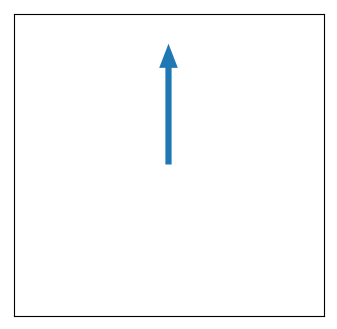

In [27]:
%matplotlib inline
from matplotlib import pyplot as plt
from IPython.display import display, clear_output   #Used for animation

# Set the figure size
fig = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(4, 4)

# Create the axis without ticks (axis labels)
ax = plt.axes(xlim=(-10, 10), ylim=(-10, 10))
plt.xticks([])
plt.yticks([])

# Create an arrow in initial position
arrow_len = 8
arrow = plt.Arrow(0, 0, 0, 0, 2)
drawn_arrow = ax.add_patch(arrow)
# Animate Arrow Clock
for angle in range(90, 90-361, -5):
    dx = arrow_len*math.cos(math.radians(angle))
    dy = arrow_len*math.sin(math.radians(angle))
    #create the new arrow
    drawn_arrow.remove()
    arrow = plt.Arrow(0, 0, dx, dy, 2)
    drawn_arrow = ax.add_patch(arrow)
    # Clear the output and display the plot
    display(fig)
    clear_output(wait=True)

> **APPROFONDIMENTO:** Un altro interessante esempio di grafico matematico. Se siete interessati ad usare Python per risolvere gli esercizi di matematica, in internet ci sono moltissimi esempi sull'uso della libreria matplotlib, spesso spiegati utilizzando proprio Jupyter. Nel codice seguente sono state utilizzate le **Liste** e la tecnica della **List Comprehension** per creare gli array relativi agli assi x ed y del grafico. Per fare grafici matematici si lavora sempre con array e matrici numeriche, esiste una libreria che offre strumenti pensati proprio per questo: la libreria **numpy** per il calcolo numerico scientifico. Con questa libreria la sintassi diventa più snella, vengono introdotti degli oggetti per lavorare su array/matrici senza la necessità di ricorrere alla list comprehension.

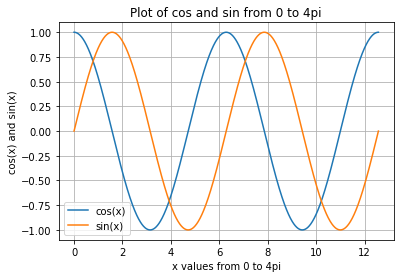

In [28]:
%matplotlib inline
from matplotlib import pyplot as plt
x_steps = 1000
x_scale = [x*4*math.pi/x_steps for x in range(0, x_steps + 1)]
y_scale = [math.cos(x) for x in x_scale]
y2_scale = [math.sin(x) for x in x_scale]
plt.plot(x_scale, y_scale, x_scale, y2_scale)
plt.xlabel('x values from 0 to 4pi')
plt.ylabel('cos(x) and sin(x)')
plt.title('Plot of cos and sin from 0 to 4pi')
plt.legend(['cos(x)', 'sin(x)'])
plt.grid()
plt.show()

Altre funzioni della libreria matematica sono i logaritmi, gli esponenziali, le funzioni di arrotondamento (per eccesso e per difetto) dei numeri decimali e molte altre:
- Esponenziale `math.exp()`
- Logaritmo `math.log()`
- Radice quadrata `math.sqrt()`
- Elevamento a potenza `math.pow()`
- Logaritmo base 10 `math.log10()`
- Arrotondamento intero per eccesso `math.ceil()`
- Arrotondamento intero per difetto `math.floor()`

Una funzione interessante della libreria matematica **introdotta nella versione di Python 3.5** (nelle versioni precedenti non è presente!) è **isclose()** che permette di **verificare se due numeri float sono uguali**, con la possibilità di definire una tolleranza sia relativa che assoluta. **Di default (se non vengono specificati altri argomenti) la tolleranza usata è relativa e pari a $10^{-9}\cdot\text{max}(a,b)$**, che tiene quindi conto della grandezza dei numeri stessi. Si può comunque definire una tolleranza assoluta se si vuole avere una elevata precisione anche nel confronto di numeri grandi (definendo una *epsilon*)

In [29]:
a = 100000.5
b = 100000.50001
print("a = {} , b = {}".format(a,b))
# Uguaglianza con tolleranza relativa di default (10^-9)
print("Solo tolleranza relativa: a == b ? {}".format(math.isclose(a, b)))
# Uguaglianza con tolleranza assoluta
epsilon = 0.000001   # definisco un epsilon
print("Solo Tolleranza assoluta: a == b ? {}".format(math.isclose(a, b, rel_tol=0, abs_tol=epsilon)))

a = 100000.5 , b = 100000.50001
Solo tolleranza relativa: a == b ? True
Solo Tolleranza assoluta: a == b ? False


## La libreria **time**

[Questa libreria](https://docs.python.org/3/library/time.html) è molto utile per lavorare con date e orari, in particolare è utile per **sapere l'ora e la data corrente**, per calcolare il tempo di esecuzione di un programma e per **mettere in pausa il programma per un certo tempo**. Quest'ultima funzionalità può essere utile per aumentare l'interattività dei nostri porgrammi, e può rappresentare una necessità nel caso in cui python sia usato per generare segnali elettrici. Si pensi ad esempio al comando di un LED in un pannello di controllo che deve eseguire un certo numero di lampeggi, veloci o lenti, per segnalare un malfunzionamento...  

Per fare operazioni con le ore e con le date (somme e differenze di date, fusi orari...) vi è la libreria **datetime**, per consultare la relativa documentazione fare click [QUI](https://docs.python.org/3/library/datetime.html#module-datetime).

> **Per i volenterosi:** Provate a risolvere l'esercizio della precedente lezione utilizzando la libreria datetime per il calcolo esatto dell'età. In questo caso chiedete all'utente di inserire la data di nascita esatta (anno, mese e giorno) ed eseguire il calcolo considerando la data attuale! Se volete fate il calcolo esatto anche con anni, mesi e giorni esprimendo il valore con la virgola.

In [38]:
import time, datetime
input_string = input("Inserire la data di nascita nel formato YYYY-MM-DD: ")
# Leggo la data di nascita
birth_day = datetime.datetime(int(input_string[0:4]), int(input_string[5:7]), int(input_string[8:10]))
# Leggo il giorno/ora corrente
today = datetime.datetime.now()
# Determino la data del mio compleanno di quest'anno. Mi interessa sapere quando è stato il
# mio ultimo compleanno, quindi confronto la data del compleanno di quest'anno con la data attuale
# Se il compleanno di quest'anno deve ancora arrivare, considero il compleanno dell'anno precedente
my_birthday_thisyear = datetime.datetime(today.year, birth_day.month, birth_day.day)
last_birthday = my_birthday_thisyear
if last_birthday > today:
    last_birthday = datetime.datetime(today.year-1, birth_day.month, birth_day.day)
# Intervallo temporale (precisione secondi) tra oggi ed il prossimo compleanno
timedelta_to_next_birthday = datetime.datetime(last_birthday.year+1, birth_day.month, birth_day.day) - last_birthday
# Calcolo l'età in anni: la parte intera è costituita dagli anni già compiuti, a cui viene sommata una 
# parte frazionaria (tra 0 e 1) proporzionale al tempo passato dal mio ultimo compleanno
years = last_birthday.year - birth_day.year + (today - last_birthday) / timedelta_to_next_birthday
# Età in mesi, considerando 12 mesi per ogni anno
months = years * 12
# Per il calcolo delle restanti quantità mi serve sapere l'esatta età in secondi, considerando anche
# il fatto che esistono anni bisestili. Uso quindi direttamente la differenza tra oggetti datetime
timedelta_from_birthday = today - birth_day
# Calcolo i microsecondi, unità più piccola con cui voglio rappresentare l'età. Sommo le componenti restituite
# dall'oggetto timedelta (giorni e secondi), converto in microsecondi e sommo l'eccedenza in microsecondi
# (che non viene inclusa negli oggetti timedelta, si veda la documentazione)
microseconds = (timedelta_from_birthday.days * (24*60*60) + timedelta_from_birthday.seconds) * (10**6) + today.microsecond
# Calcolo le altre forme per l'età, in virgola mobile. La precisione è in microsecondi
milliseconds = microseconds / 1000
seconds = milliseconds / 1000
minutes = seconds / 60
hours = minutes / 60
days = hours / 24
weeks = days / 7
# Visualizzo le età opportunamente formattate, limitando i numeri float alla 3 cifra dopo la virgola
print("Età in anni: %.7f" % years)
print("Età in mesi: %.3f" % months)
print("Età in settimane: %.3f" % weeks)
print("Età in giorni: %.3f" % days)
print("Età in ore: %.3f" % hours)
print("Età in minuti: %.3f" % minutes)
print("Età in secondi: %.3f" % seconds)
print("Età in millisecondi: %.3f" % milliseconds)
print("Età in microsecondi: %d" % microseconds)

Inserire la data di nascita nel formato YYYY-MM-DD:  1987-10-29


Età in anni: 31.3657205
Età in mesi: 376.389
Età in settimane: 1636.641
Età in giorni: 11456.488
Età in ore: 274955.712
Età in minuti: 16497342.716
Età in secondi: 989840562.981
Età in millisecondi: 989840562981.062
Età in microsecondi: 989840562981062


In [30]:
import time

Vediamo alcune funzioni legate al tempo corrente. la funzione *time()* ad esempio restituisce l'ora e data corrente in **secondi** a partire dall'inizio dell'epoca, ovvero il 1 gennaio 1970. La funzione *ctime()* converte il valore in secondi nella rappresentazione testuale (stringa) della data e dell'ora. Se non viene passato un valore in secondi, automaticamente viene usato il valore corrente.

In [31]:
time.gmtime(0)

time.struct_time(tm_year=1970, tm_mon=1, tm_mday=1, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=3, tm_yday=1, tm_isdst=0)

In [32]:
# Ora/data corrente in ms
current_time = time.time()
print(current_time)

# Ora/Data locale, conversione da secondi
date_and_time = time.ctime(current_time)
print(date_and_time)

1552300538.6883645
Mon Mar 11 11:35:38 2019


In [33]:
# Restituisce un oggetto struct_time (non è altro che una Named Tuple)
# contenente data ed ora locali
struct_date_time = time.localtime()
print(struct_date_time)
# Formattazione stringa con solamente l'ora
hour_string = time.strftime("%H:%M:%S")
# Formattazione stringa con solamente la data, nell'ordine Italiano
date_string = time.strftime("%d-%m-%Y")
print("Ora corrente: %s" % hour_string)
print("Data corrente (ITA): %s" % date_string)

time.struct_time(tm_year=2019, tm_mon=3, tm_mday=11, tm_hour=11, tm_min=36, tm_sec=17, tm_wday=0, tm_yday=70, tm_isdst=0)
Ora corrente: 11:36:17
Data corrente (ITA): 11-03-2019


In [34]:
# converte una stringa (formattata) in un oggetto struct_time
stringa = "Date: 18/07/2018 - Time: 15:42"
when = time.strptime(stringa, "Date: %d/%m/%Y - Time: %H:%M")
print(when)

# Accedo agli elementi di struct_time. Essendo una Named Tuple
# Posso accedere con il nome o con l'indice
print("Anno: " + str(when.tm_year) + " - Giorno: " + str(when[2]) + " - Mese: " + str(when.tm_mon))

time.struct_time(tm_year=2018, tm_mon=7, tm_mday=18, tm_hour=15, tm_min=42, tm_sec=0, tm_wday=2, tm_yday=199, tm_isdst=-1)
Anno: 2018 - Giorno: 18 - Mese: 7


Una delle funzioni più utili della libreria time quando si intendono eseguire automatismi è la funzione **sleep()** che permette di mettere in pausa il programma per un periodo di tempo espresso in secondi (ma può essere anche un numero con la virgola inferiore al secondo)

In [35]:
# Visualizzo delle stringhe con ritardo di 1.5 secondi
print("La prima stringa")
time.sleep(1.5)
print("Questa frase compare dopo!")
time.sleep(1.5)
print("Siamo a 3 secondi!")

La prima stringa
Questa frase compare dopo!
Siamo a 3 secondi!


In [36]:
# Posso usare la libreria Output di Jupyter (funziona solo in Jupyter)
# per visualizzare i messaggi sulla stessa linea, andando a cancellare
# di volta in volta l'output precedente. Nel caso 
from IPython.display import clear_output 
print("La prima stringa")
time.sleep(1.5)
clear_output(wait=True)
print("Questa frase compare dopo!")
time.sleep(1.5)
clear_output(wait=True)
print("Siamo a 3 secondi!")

# Per fare la stessa cosa nei terminali (windows e linux), si può usare:
# import os
# os.system('cls' if os.name == 'nt' else 'clear')

Siamo a 3 secondi!


# I numeri complessi

Il linguaggio Python supporta nativamente anche i numeri complessi, potete quindi utilizzarlo come strumento per risolvere, ad esempio, problemi di elettrotecnica con i fasori, dove vengono utilizzati i numeri complessi. La classe che descrive i numeri complessi in Python è **complex()**, i numeri complessi sono composti da una parte reale ed una immaginaria i cui valori possono essere interi (descritti da int) o numeri in virgola mobile (descritti da float).  
Qualsiasi numero in cui compaia una parte immaginaria per Python è immaginario, ad esempio:

In [39]:
# Numero complesso con parti real ed imag float
complesso1 = 12.5+23.6j
print(complesso1)
print(type(complesso1))
# Numero complesso con parti real ed imag int
complesso2 = -6+8j
print(complesso2)
print(type(complesso2))
# Numero complesso con parte solo immaginaria
complesso3 = 8j
print(complesso3)
print(type(complesso3))
# Numero complesso con parte solo reale
complesso4 = 1+0j
print(complesso4)
print(type(complesso4))

(12.5+23.6j)
<class 'complex'>
(-6+8j)
<class 'complex'>
8j
<class 'complex'>
(1+0j)
<class 'complex'>


Un numero puo' essere convertito in complesso usando il costruttore della classe complex per effettuare il type casting, ad esempio per convertire un intero in un numero complesso possiamo usare

In [40]:
un_intero = 23
complesso5 = complex(un_intero)
print(complesso5)

(23+0j)


Le operazioni matematiche tradizionali sono definite anche con i numeri complessi (`+ - * / abs()`), inoltre ogni oggetto di tipo complex offre due attributi, **real** ed **imag** per estrarre le parti reale ed immaginaria ed il metodo **conjugate()** per generare il coniugato (numero complesso con parte immaginaria negata). Ricordiamo che i complex sono NOT mutable come gli altri tipi numerici e quindi questo metodo restituisce un nuovo oggetto.

In [41]:
print("Parte reale: {} - Parte immaginaria: {} - Coniugato: {}".format(complesso1.real, complesso1.imag, complesso1.conjugate()))

Parte reale: 12.5 - Parte immaginaria: 23.6 - Coniugato: (12.5-23.6j)


In [42]:
# Alcune operazioni con i complessi:
print(abs(complesso1))    # Restituisce il modulo
print(complesso1 + complesso2)
print(complesso1 / complesso2)

26.705991837039118
(6.5+31.6j)
(1.1380000000000001-2.4160000000000004j)


Python mette a disposizione una **libreria matematica built-in** per i calcoli con i numeri complessi: **cmath**. In *cmath* troviamo funzioni analoghe a quelle contenute nella libreria *math*, ma per i numeri complessi. Ad esempio le funzioni goniometriche, esponenziali, logaritmi... E la funzione **isclose()** per verificare se due numeri complessi sono uguali, disponibile da Python 3.5.  
Tre funzioni utili della libreria per i calcoli con i numeri complessi sono:
- **phase()** che restituisce la fase del numero complesso (angolo tra i fasori), compreso tra $-\pi$ e $\pi$ (radianti)
- **polar()** che restituisce la coppia (valore assoluto, fase) del numero complesso, ovvero le sue coordinate polari
- **rect()** che converte la rappresentazione polare del numero complesso (valore assoluto e fase) nella sua versione cartesiana, ovvero la rappresentazione nella forma classica $\text{Re}+\text{Im}\cdot j$

<div style="text-align:center"><img width="350px" src="images/dalla-forma-esponenziale-alla-forma-cartesiana.png"></div>

In [43]:
import cmath
print("Numero complesso: " + str(complesso1))
complesso1_polar = cmath.polar(complesso1)
print("Coordinate Polari: " + str(complesso1_polar))
print("Sfaso di pi radianti")
complesso1_polar_pi = (complesso1_polar[0], complesso1_polar[1] + cmath.pi)
print("Ottengo le coordinate Polari: " + str(complesso1_polar_pi))
print("Rappresentazione cartesiana: " + str(cmath.rect(complesso1_polar_pi[0], complesso1_polar_pi[1])))

Numero complesso: (12.5+23.6j)
Coordinate Polari: (26.705991837039118, 1.0837024288385295)
Sfaso di pi radianti
Ottengo le coordinate Polari: (26.705991837039118, 4.225295082428323)
Rappresentazione cartesiana: (-12.499999999999998-23.599999999999998j)


## Numeri Booleani

In Python vi è la classe **bool** che descrive oggetti di tipo booleano, ovvero in grado di assumere solo i valori **True** e **False**. Per Python **True** (con la T maiuscola) e **False** (con la F maiuscola) sono due oggetti, il primo corrisponde alla condizione VERO la seconda alla condizione FALSO. La classe bool è una sottoclasse di int.

In [44]:
vero = True
falso = False
print(type(vero))
print(type(falso))

<class 'bool'>
<class 'bool'>


Possiamo sempre convertire un bool in una stringa o in un intero. La conversione in stringa è "True" o "False", mentre la conversione in intero 1 oppure 0. Dato che la classe bool estende la classe int (ridefinendo alcune cose, come ad esempio il metodo *`__str__()`*) sono disponibili tutte le operazioni matematiche degli interi, come l'addizione, la sottrazione...

In [45]:
print(str(vero))
print(int(vero))
print(str(falso))
print(int(falso))

True
1
False
0


Se abbiamo un numero intero possiamo convertirlo in un booleano usando **bool()**: uno 0 diventa False, mentre qualsiasi altro numero, positivo o negativo, diventa True.

In [47]:
esito = bool(0)
print(esito)
esito = bool(5)
print(esito)

False
True


I bool sono fondamentali in Python perchè **il risultato di qualsiasi operazione di confronto è un bool**. Tra i bool sono definite anche le operazioni booleane, come ad esempio **or**, **and**, **not**, da non confondere con gli operatori logici tra bit (& | ^ ~) di cui abbiamo parlato quando abbiamo fatto gli oggetti int. Ecco alcuni esempi:

In [48]:
# Maggiore, Minore, Maggiore-Uguale, Minore-Uguale: >  <  >=  <=
# Uguale e Diverso:  ==   !=
print(5 > 8)
print(10 > 8)
print(5 <= 5)
print(3 < 9)
print(5 == 3)
print(5 != 3)

False
True
True
True
False
True


In [49]:
# operatore OR: Il risultato è True se almeno uno dei due termini è True
print(True or False)
print(True or True)
# operatore AND: il risultato è True se entrambi i termini sono True
print(True and False)
print(True and True)
# operatore NOT: nega il bool
print(not True)

True
True
False
True
False


Utilizzando gli operatori booleani è possibile definire qualsiasi condizione complessa:

In [52]:
a = 5
b = 8
c = 23
esito = (a > b) or ((c >= b) and (b > a)) or (not (a - 3 > 0))
print(esito)

True


Anche i bool sono numeri e possono essere confrontati tra loro. Ad esempio si può definire una XOR (OR Esclusiva), che vale True quando i due termini sono diversi e False quando sono uguali, in questo modo:

In [53]:
bool_a = True
bool_b = False
exor = bool_a != bool_b
print("A xor B = " + str(exor))

A xor B = True


> **APPROFONDIMENTO**: Gli operatori **or** e **and** possono essere utilizzati anche con oggetti diversi dai bool, in questo caso il funzionamento è il seguente:
- Il primo termine viene convertito in bool (type cast) e valutato. Se si hanno già elementi sufficienti per trarre una conclusione sul risultato viene restituito il primo termine nella sua forma originale (es. se era un int viene restituito un int, se era già un bool viene restituito un bool)
  - Ad esempio con **or** se il primo termine viene valutato True è sufficiente per concludere che il risultato sarà True, non serve valutare il secondo termine
  - Ad esempio con **and** se il primo termine viene valutato False è sufficiente per concludere che il risultato sarà False, non serve valutare il secondo termine
- Se non è possibile trarre una conclusione sul risultato, viene restituito il secondo termine nella sua forma originale
- Ogni oggetto può essere convertito in bool (esiste un dunder method che definisce come avviene la conversione). per i tipi standard di Python:
  - Una stringa vuota è False, altrimenti è True
  - Un intero 0 è False, altrimenti è True
  - Una Lista vuota è False, altrimenti è True
  - Una Tuple, un Set o un Dictionary si comportano come la Lista
  - Un `None` (riferimento nullo) è False, altrimenti viene valutato l'oggetto passato. Se si tratta di un oggetto descritto da una classe realizzata da noi che **non** implementa il metodo `__bool__()` viene restituito True, altrimenti viene restituito ciò che restituisce tale metodo

In [54]:
# Esempio: come vengono convertiti in bool diversi oggetti
print(bool(""))
print(bool([]))
print(bool({}))
print(bool(()))

False
False
False
False


In [55]:
class myclass1():
    def __init__(self):
        pass   # comando per non fare niente, non esegue istruzioni
    
class myclass2():
    def __init__(self, text):
        self.text = text
    def __bool__(self):
        return (self.text == "ciao")    # Ritorna True solo se l'oggetto è inizializzato a "ciao"

oggetto = None
print(bool(oggetto)) 
oggetto = myclass1()
print(bool(oggetto)) 
oggetto = myclass2("")
print(bool(oggetto)) 
oggetto = myclass2("ciao")
print(bool(oggetto)) 

False
True
False
True


In [56]:
# Esempio di uso dell'operatore or con oggetti di tipo diverso
print(True or "ciao")
print(False or "ciao")
print("" or "ciao")
print("mondo" or "ciao")
print(0 or "ciao")
print(1 or "ciao")

True
ciao
ciao
mondo
ciao
1


In [58]:
# Un caso pratico d'uso di or con oggetti diversi: valore di default quando l'input è una stringa nulla
input_default = 15
numero = int(input("Inserire il numero richiesto [default {}]".format(input_default)) or input_default)
print("Il numero inserito è {}".format(numero))

Inserire il numero richiesto [default 15] 


Il numero inserito è 15


## Il costrutto **if - elif - else**
In Python è possibile eseguire una porzione di codice se una condizione è vera, altrimenti eseguirne un'altra: viene usato il cosiddetto costrutto if, presente in praticamente tutti i linguaggi di programmazione. La sintassi è la seguente:
```python
if condizione:
    ### Codice eseguito se bool(condizione) viene valutata True
    pass
elif condizione2:
    ### Codice eseguito se la precedente condizione non si è verificata e se bool(condizione2) viene valutata True
    pass
elif condizioneN:
    ### Codice eseguito se TUTTE le precedenti condizioni non si sono verificate e se bool(condizioneN) viene valutata True
    pass
else:
    ### Codice eseguito se TUTTE le precedenti condizioni non si sono verificate
    pass
```
Le parti **elif** ed **else** del costrutto **sono opzionali**, se non sono presenti infatti Python si limita a verificare la condizione principale, se è True viene eseguito il relativo codice, se è False il ciclo termina e il programma va avanti con l'istruzione successiva al costrutto if. Se si vogliono verificare più condizioni mutuamente esclusive si possono usare gli **elif**, per eseguire semplicemente delle operazioni differenti quando *condizione* non è verificata si usa un costrutto **if-else**
> **Ricordate che:** In python si usano le **indentazioni per dividere i blocchi di codice**, allo stesso modo in cui in C si usano le parentesi graffe {}. **Per indentare il codice si usano le TABULAZIONI** e non gli spazi. In Python le intestazioni che definiscono i blocchi di un costrutto terminano sempre con i **due punti :**, a capo segue il blocco di codice indentato. Nel caso di **costrutti if annidiati** è importante verificare che le indentazioni siano corrette

```python
### Istruzioni
### Precedenti 
### Al costrutto
if condizione:
    ### Codice eseguito se bool(condizione) viene valutata True
    if condizione2:
        ## Codice eseguito se condizione è True e condizione2 è True
        if condizione3:
            ## Codice eseguito se condizione è True, condizione2 è True e condizione3 è True
            pass
    else:
        ## Codice eseguito se condizione è True e condizione2 è False 
        pass
else:
    ### Codice eseguito se condizione è False
    if condizione2:
        ## Codice eseguito se condizione è False e condizione2 è True
        if condizione3:
            ## Codice eseguito se condizione è False, condizione2 è True e condizione3 è True
            pass
        elif condizione4:
            ## Codice eseguito se condizione è False, condizione2 è True, condizione3 è False e condizione4 è True
            pass
        else:
            ## Codice eseguito se condizione è False, condizione2 è True, condizione3 è False e condizione4 è False
            pass
    else:
        ## Codice eseguito se condizione è False e condizione2 è False 
        pass
### Istruzioni
### Successive 
### Al costrutto
```
> L'istruzione **pass** in Python viene utilizzata per indicare che non deve essere eseguita alcuna operazione. Python non ammette blocchi di codice senza codice, quindi dopo una intestazione di un costrutto (dopo i ":") non si può lasciare una riga vuota. Per indicare che nulla viene eseguito di deve scrivere pass, altrimenti viene generata una eccezione. 
>> Si può usare pass anche quando si sta scrivendo un programma complesso e si "vuole lasciare indietro" l'implementazione di una parte di codice, ad esempio quando si definiscono funzioni e metodi.

In [ ]:
# Esempio con il costrutto if
temperatura = float(input("Inserisci la temperatura odierna e ti dirò che penso: "))
if temperatura < 0:
    print("Siamo sotto zero...")
    if temperatura < -20:
        print("Ciao statua di ghiaccio!")
    elif temperatura < -10:
        print("Non si può sopravvivere per molto così! Ma sognando una spiaggia soleggiata puoi mitigare gli effetti del freddo!")
    else:
        print("Spero che tu abbbia una bella giacca pesante, sciarpa e berretto!")
elif temperatura == 0:
    print("Forse oggi viene da nevicare, brrrr....")
else:
    if temperatura > 5:
        pass
    if temperatura < 10:
        print("Fa freddino, ma sopportabile se non tira molto vento!")
    else:
        if temperatura < 20:
            print("La primavera si avvicina! O forse l'autunno?")
        elif temperatura >= 20 and temperatura < 30:
            print("Questo è il mio clima ideale! Andiamo a fare una passeggiata?")
        else:
            print("Siamo in estate! Ci vuole un gelato!")
        if temperatura > 40:
            print("Ti scioglierai e ti dovrò raccogliere con un cucchiaino!")
casa = input("Sei dentro casa? [si] ").strip().lower() or "si"
if casa == "si":
    if temperatura < 20:
        print("Spero che tu abbia il riscaldamento!")
    elif temperatura > 30:
        print("Spero che tu abbia il condizionatore!")
    else:
        print("Puoi aprire la finestra, c'è un'ottima temperatura fuori!")
else:
    if casa != "no":
        print("Lo prendo per un no...")
    if temperatura < 20:
        print("Spero che tu abbia il giusto abbigliamento per stare al caldo...")
    elif temperatura > 30:
        print("Potresti sentire l'esigenza ti toglierti anche la pelle!")
    else:
        print("Buona passeggiata!")

In Python esiste anche il **costrutto if in-line**, utile se si vuole assegnare ad una variabile un oggetto piuttosto che un altro al verificarsi di una condizione. La sintassi è:
```python
oggetto = espressione1 if condizione else espressione2
```
Se *condizione* è True viene eseguita *espressione1* ed assegnato il risultato ad *oggetto*, altrimenti viene eseguita *espressione2* ed assegnato il risultato ad *oggetto*. In questo caso deve essere sempre presente sia l'if che l'else.

In [ ]:
condizione_esterna = "Giornata Calda" if temperatura > 20 else "Giornata Fredda"
print(condizione_esterna)

## Il ciclo While
Il Ciclo While è il ciclo condizionato che Python mette a disposizione: tutto il codice racchiuso da questo ciclo viene eseguito continuamente fintanto che la condizione indicata risulta True. Il ciclo While ha la seguente sintassi:
```python
while condizione:
    ### Codice eseguito finchè condizione è True
    pass
```
**L'espressione utilizzata come condizione deve poter cambiare nel corso dell'esecuzione del ciclo altrimenti il ciclo diventa infinito**, questo cambiamento può avvenire per due motivi:
- Le operazioni eseguite dal ciclo stesso causano una modifica della condizione, permettendo quindi l'uscita dal ciclo
- La condizione viene modificata da un fenomeno esterno al ciclo:
  - Esempio: potrebbe essere il valore misurato da un sensore, o lo stato di un pin, la lettura di una variabile esterna tramite API, la richiesta di un dato in input...
  - Esempio: potrebbe essere il valore di una variabile scritta da un processo che viene eseguito in parallelo al ciclo While (applicazione multithread utilizzando le librerie threading)
Se la condizione del ciclo è legata a una variabile che viene modificata dall'interno del ciclo stesso, **tale variabile deve necessariamente essere inizializzata prima del ciclo**, altrimenti si ottiene un errore del tipo "variabile not defined". L'impiego più semplice del ciclo While si ha nella realizzazione di contatori ed accumulatori: il ciclo può volutamente terminare **dopo un numero finito di iterazioni oppure dopo un numero indefinito**.  
Ad esempio un ciclo While che conta da 0 a 10 si programma nel seguente modo:

In [ ]:
counter = 0    # Definisco la variabile del contatore e la inizializzo
while counter < 11:    # Il miociclo termina quando counter < 11
    print(counter)
    counter += 1       # Incremento di uno il contatore
print("END!")

> **Osservazione:** Nel Python i cicli For sono diversi rispetto al C. Nel C/C++ ed anche in altri linguaggi è possibile definire delle operazioni arbitrarie sulla variabile di ciclo ed una condizione di verifica arbitraria per decidere la terminazione del ciclo. Ad esempio si può utilizzare una variabile di tipo double ed incrementarla di 0.5 ad ogni iterazione:  
> ```C
> for (double i = 0; i < 10; i += 0.5) {
>     //Istruzioni
>     printf("%f\n", i);
> }
> ```
> Nel Python i cicli For, come vedremo, non hanno questa struttura: sono pensati per scansionare iterables non per incrementare variabili numeriche secondo condizioni particolari. Per questi compiti in Python si usano direttamente i cicli While, tranne nel caso semplice di **enumerazione da N ad M con step P** dove Python mette a disposizione un oggetto (**range**) che rende l'operazione più semplice da eseguire con i cicli For.
> L'esempio in C si traduce nel codice Python:
> ```python
> i = 0.0    # è un float
> while i < 10:
>     # Istruzioni
>     print(i)
>     i += 0.5
> ```

Vediamo adesso un **esempio dove il ciclo While viene eseguito un numero indefinito di volte**. È il caso della richiesta di immissione di una serie di dati da parte dell'utente, senza sapere a priori quanti dati l'utente intende immettere.  
Realizziamo un sommatore, ovvero un programma che presenta la somma dei numeri inseriti. La condizione di terminazione è data dall'input nullo

In [ ]:
somma = 0.0    #inizializzo la variabile somma
dato_in = input("Inserire un numero: ")    #prima richiesta
while dato_in:    #finchè dato_in è True, ovvero non nullo (ricordo che le stringhe nulle "" vengono valutate False)
    somma_old = somma
    somma += float(dato_in)
    print("somma = {} + {} = {}".format(somma_old, float(dato_in), somma))
    dato_in = input("Inserire un numero: ")    #richieste successive (indefinite)
print("Fine Inserimento. La somma complessiva è: " + str(somma))

Nel prossimo esempio vediamo il **caso in cui la condizione del ciclo While viene modificata da un thread eseguito in parallelo al ciclo**. In questo caso viene definita una funzione `generate_stop()` che imposta a False la condizione `do_while` del ciclo dopo 5 secondi dall'inizio dell'esecuzione del codice. Nel frattempo il ciclo viene eseguito in quanto `do_while` è inizializzata a True.

In [ ]:
from threading import Thread
import time
do_while = True    # Inizializza la condizione a True
timeout = 5        # Durata timeout 5 secondi

# Funzione associata al Thread parallelo
def generate_stop():
    global do_while, timeout
    print("Thread parallelo avviato, termina in {} secondi".format(timeout))
    time.sleep(timeout)
    do_while = False
    print("Thread parallelo terminato")

# Avvia il thread parallelo
parallel_thread = Thread(target=generate_stop)
parallel_thread.start()

# Ciclo While
iterazioni = 0
while do_while:
    iterazioni += 1
    print("Eseguo il ciclo While. Iterazione #" + str(iterazioni))
    time.sleep(0.5)
print("Ciclo While Terminato")

**Un ciclo infinito** in Python si realizza con un ciclo While impostando la condizione a True. Un ciclo infinito potrebbe essere utilizzato per realizzare ad esempio un sistema di controllo ad anello chiuso (es. termostato). Generalmente l'unico modo di interrompere un ciclo infinito è il verificarsi di una eccezione, il codice posto dopo un ciclo infinito non viene mai eseguito a meno che non venga effettuata una gestione ottimale delle eccezioni (senza la quale il programma crasha a seguito dell'errore).
```python
while True:
    ### Codice eseguito all'infinito
    pass
```
Un ciclo While **può essere interrotto manualmente dall'interno usando l'istruzione break** (anche i cicli infiniti). Viene utilizzato un costrutto if per determinare in quali condizioni il ciclo debba essere interrotto manualmente. Vediamo di seguito l'esempio del contatore da 0 a 10 realizzato per mezzo di un ciclo infinito con interruzione manuale:
```python
while True:
    ### Codice eseguito fino al verificarsi della condizione di uscita
    if condizione:
        break    
```

In [ ]:
counter = 0
while True:    # Ciclo infinito
    print(counter)
    if counter == 10:    # Al verificarsi della condizione interrompo manualmente con break
        break
    counter += 1
print("END!")

L'esempio del sommatore diventa:

In [ ]:
somma = 0.0    #inizializzo la variabile somma
while True:
    dato_in = input("Inserire un numero: ")    #richieste successive (indefinite)
    if dato_in == "":
        break
    somma_old = somma
    somma += float(dato_in)
    print("somma = {} + {} = {}".format(somma_old, float(dato_in), somma)) 
print("Fine Inserimento. La somma complessiva è: " + str(somma))

Esiste anche una istruzione denominata **continue** che causa l'interruzione dell'iterazione corrente, ovvero salta tutte le istruzioni che seguono e inizia una nuova iterazione. Quando si usa questa istruzione bisogna sempre verificare che la condizione venga aggiornata nel modo corretto per evitare comportamenti non desiderati del ciclo (esempio: trasformare un ciclo finito in infinito). Ecco un esempio dove si usa *continue* per realizzare un contatore che stampa solo i numeri pari

In [ ]:
counter = 0
while True:    # Ciclo infinito
    if counter % 2 == 1:    # Se il contatore è dispari... 
        counter += 1        #...mi limito a passare al numero successivo...
        continue            #...e termino l'iterazione corrente
    print(counter)
    if counter == 10:    # Al verificarsi della condizione interrompo manualmente con break
        break
    counter += 1
print("END!")

## Esercizio: Fibonacci con i cicli While
Data la definizione di **successione di Fibonacci**: https://it.wikipedia.org/wiki/Successione_di_Fibonacci
Si richiede la realizzazione dei seguenti **3 programmi**, scrivendo ogni programma in un singolo blocco Jupyter (mi raccomando, tenete ordinato, ben formattato e documentato il vostro foglio degli esercizi):
1. Usando un ciclo While, scrivere un programma che: 
  - **Chieda** all'utente un indice N>1
  - **Visualizzi** i primi N numeri di Fibonacci, stampandoli a schermo con opportuna formattazione, ovvero indicando l'indice N ed il numero ottenuto dall'algoritmo, Fib(N) 
  - **Provare**, usando quanto imparato finora (While, stringhe, string slicing), a stampare a schermo il numero di Fibonacci con il separatore "'" per le migliaia. Ad esempio stampare `102'334'155` anziche `102334155`.
2. Usando un ciclo While, scrivere un programma che realizzi una Fibonacci App dotata di menu interattivo. Il programma deve: 
  - **Chiedere Inizialmente** un indice N>1 con cui calcolare il primo numero di Fibonacci Fib(N)
  - **Visualizzare un Menu testuale** (nel nostro caso il menu può essere costituito anche da una sola domanda) che permetta di:
    - **Chiedere** all'utente **se** visualizzare **il prossimo numero di Fibonacci Fin(N+1)** (*ben formattato come nel punto precedente*), partendo dal precedente N salvato in una variabile. Il programma in questo caso ha delle variabili che memorizzano lo **"stato" di un processo** (l'algoritmo iterativo di Fibonacci) e costituisce un **Sistema con Memoria** 
    - **Dare la possibilità** all'utente di cambiare l'indice N
    - **Prevedere come opzione di default** la visualizzazione del Fibonacci successivo, se l'utente non inserisce una risposta e preme semplicemente invio
    - **Terminare il programma** se l'utente non vuole visualizzare alcun numero successivo
    - **Il menu deve essere realizzato usando una singola istruzione input()**
    > Un esempio di richiesta potrebbe essere:  
    > `'Per visualizzare il prossimo numero di Fibonacci digitare "si", per uscire dal programma digitare "no", per visualizzare il numero di fibonacci di indice N inserire semplicemente il numero intero [default: "si"]: '`  
    > Ricordatevi di far fronte anche ad eventuali errori di digitazione (spazi, maiuscole) in modo da garantire il corretto riconoscimento del comando. Il comando NON deve essere *case sensitive*
3. **Copiare** il codice della lezione che realizza un *thread parallelo per interrompere il ciclo While dopo un certo tempo*. **Modificarlo** in modo che:
  - **Venga chiesto** inizialmente all'utente per **quanti secondi** eseguire il programma
  - **Venga stampato** (ben formattato come nei casi precedenti) un numero di Fibonacci **ogni 0.75 secondi** per la durata impostata, partendo dal numero di indice N indicato
  - **Il programma termini** grazie al thread parallelo dopo il tempo di esecuzione specificato
Scrivete i tre programmi rispettando l'ordine con cui vengono richiesti nella consegna

## I Cicli For

Saranno argomento della prossima lezione Venerdì